Dataset Link:

In [1]:
#importing necessary packages for data analysis and visualization
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading the dataset
df=pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.shape

(32581, 12)

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Column Descriptions

**person_age:** Age of the individual applying for the loan.

**person_income:** Annual income of the individual.

**person_home_ownership:** Type of home ownership of the individual.
* rent: The individual is currently renting a property.
* mortgage: The individual has a mortgage on the property they own.
* own: The individual owns their home outright.
* other: Other categories of home ownership that may be specific to the dataset.

**person_emp_length:** Employment length of the individual in years.

**loan_intent:** The intent behind the loan application.

**loan_grade:** The grade assigned to the loan based on the creditworthiness of the borrower.
* A: The borrower has a high creditworthiness, indicating low risk.
* B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
* C: The borrower's creditworthiness is moderate.
* D: The borrower is considered to have higher risk compared to previous grades.
* E: The borrower's creditworthiness is lower, indicating a higher risk.
* F: The borrower poses a significant credit risk.
* G: The borrower's creditworthiness is the lowest, signifying the highest risk.

**loan_amnt:** The loan amount requested by the individual.

**loan_int_rate:** The interest rate associated with the loan.

**loan_status:** Loan status, where 0 indicates non-default and 1 indicates default.
* 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
* 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.

**loan_percent_income:** The percentage of income represented by the loan amount.

**cb_person_default_on_file:** Historical default of the individual as per credit bureau records.
* Y: The individual has a history of defaults on their credit file.
* N: The individual does not have any history of defaults.

**cb_preson_cred_hist_length:** The length of credit history for the individual.

In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Although it loosk like there are scaling mismatch in the data at a glance, but it is due to the range of different scales

In [98]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
#check to see if there are NUll values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

It seems there are null values but in sensitive case such as this it is better to remove null values as we have bigger dataset

In [8]:
df.dropna(inplace=True)

In [9]:
#check if there are duplicated values
df.duplicated().sum()

np.int64(137)

Duplicated data is same as NUll values as it means same values are repeated across rows which does not yield any meaningful results

In [10]:
#remove duplicated values
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(28501, 12)

In [12]:
#check number of unique values in each columns
df.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

#Lets start with EDA 

First lets go with visualization of each type of column 

In [13]:
#Since by value_counts alone we can't get the whole picture, lets use histogram to see the distribution of numerical columns
target_variable='loan_status'
numerical_columns=[col for col in df.columns if df[col].dtype in ['int64','float64']
                   and col !=target_variable]
cat_cols=[col for col in df.columns if df[col].dtype=='object']

#cat indices
cat_indices=[df.columns.get_loc(col) for col in cat_cols]


In [14]:
#function to plot histogram
def plot_histograms(df,variables,kde=None):
    plt.figure(figsize=(20,20))
    for i, column in enumerate(variables,1):
        plt.subplot(3,3,i)
        sns.histplot(df[column],kde=kde)
        plt.title(f'{column} histogram')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Numerical features


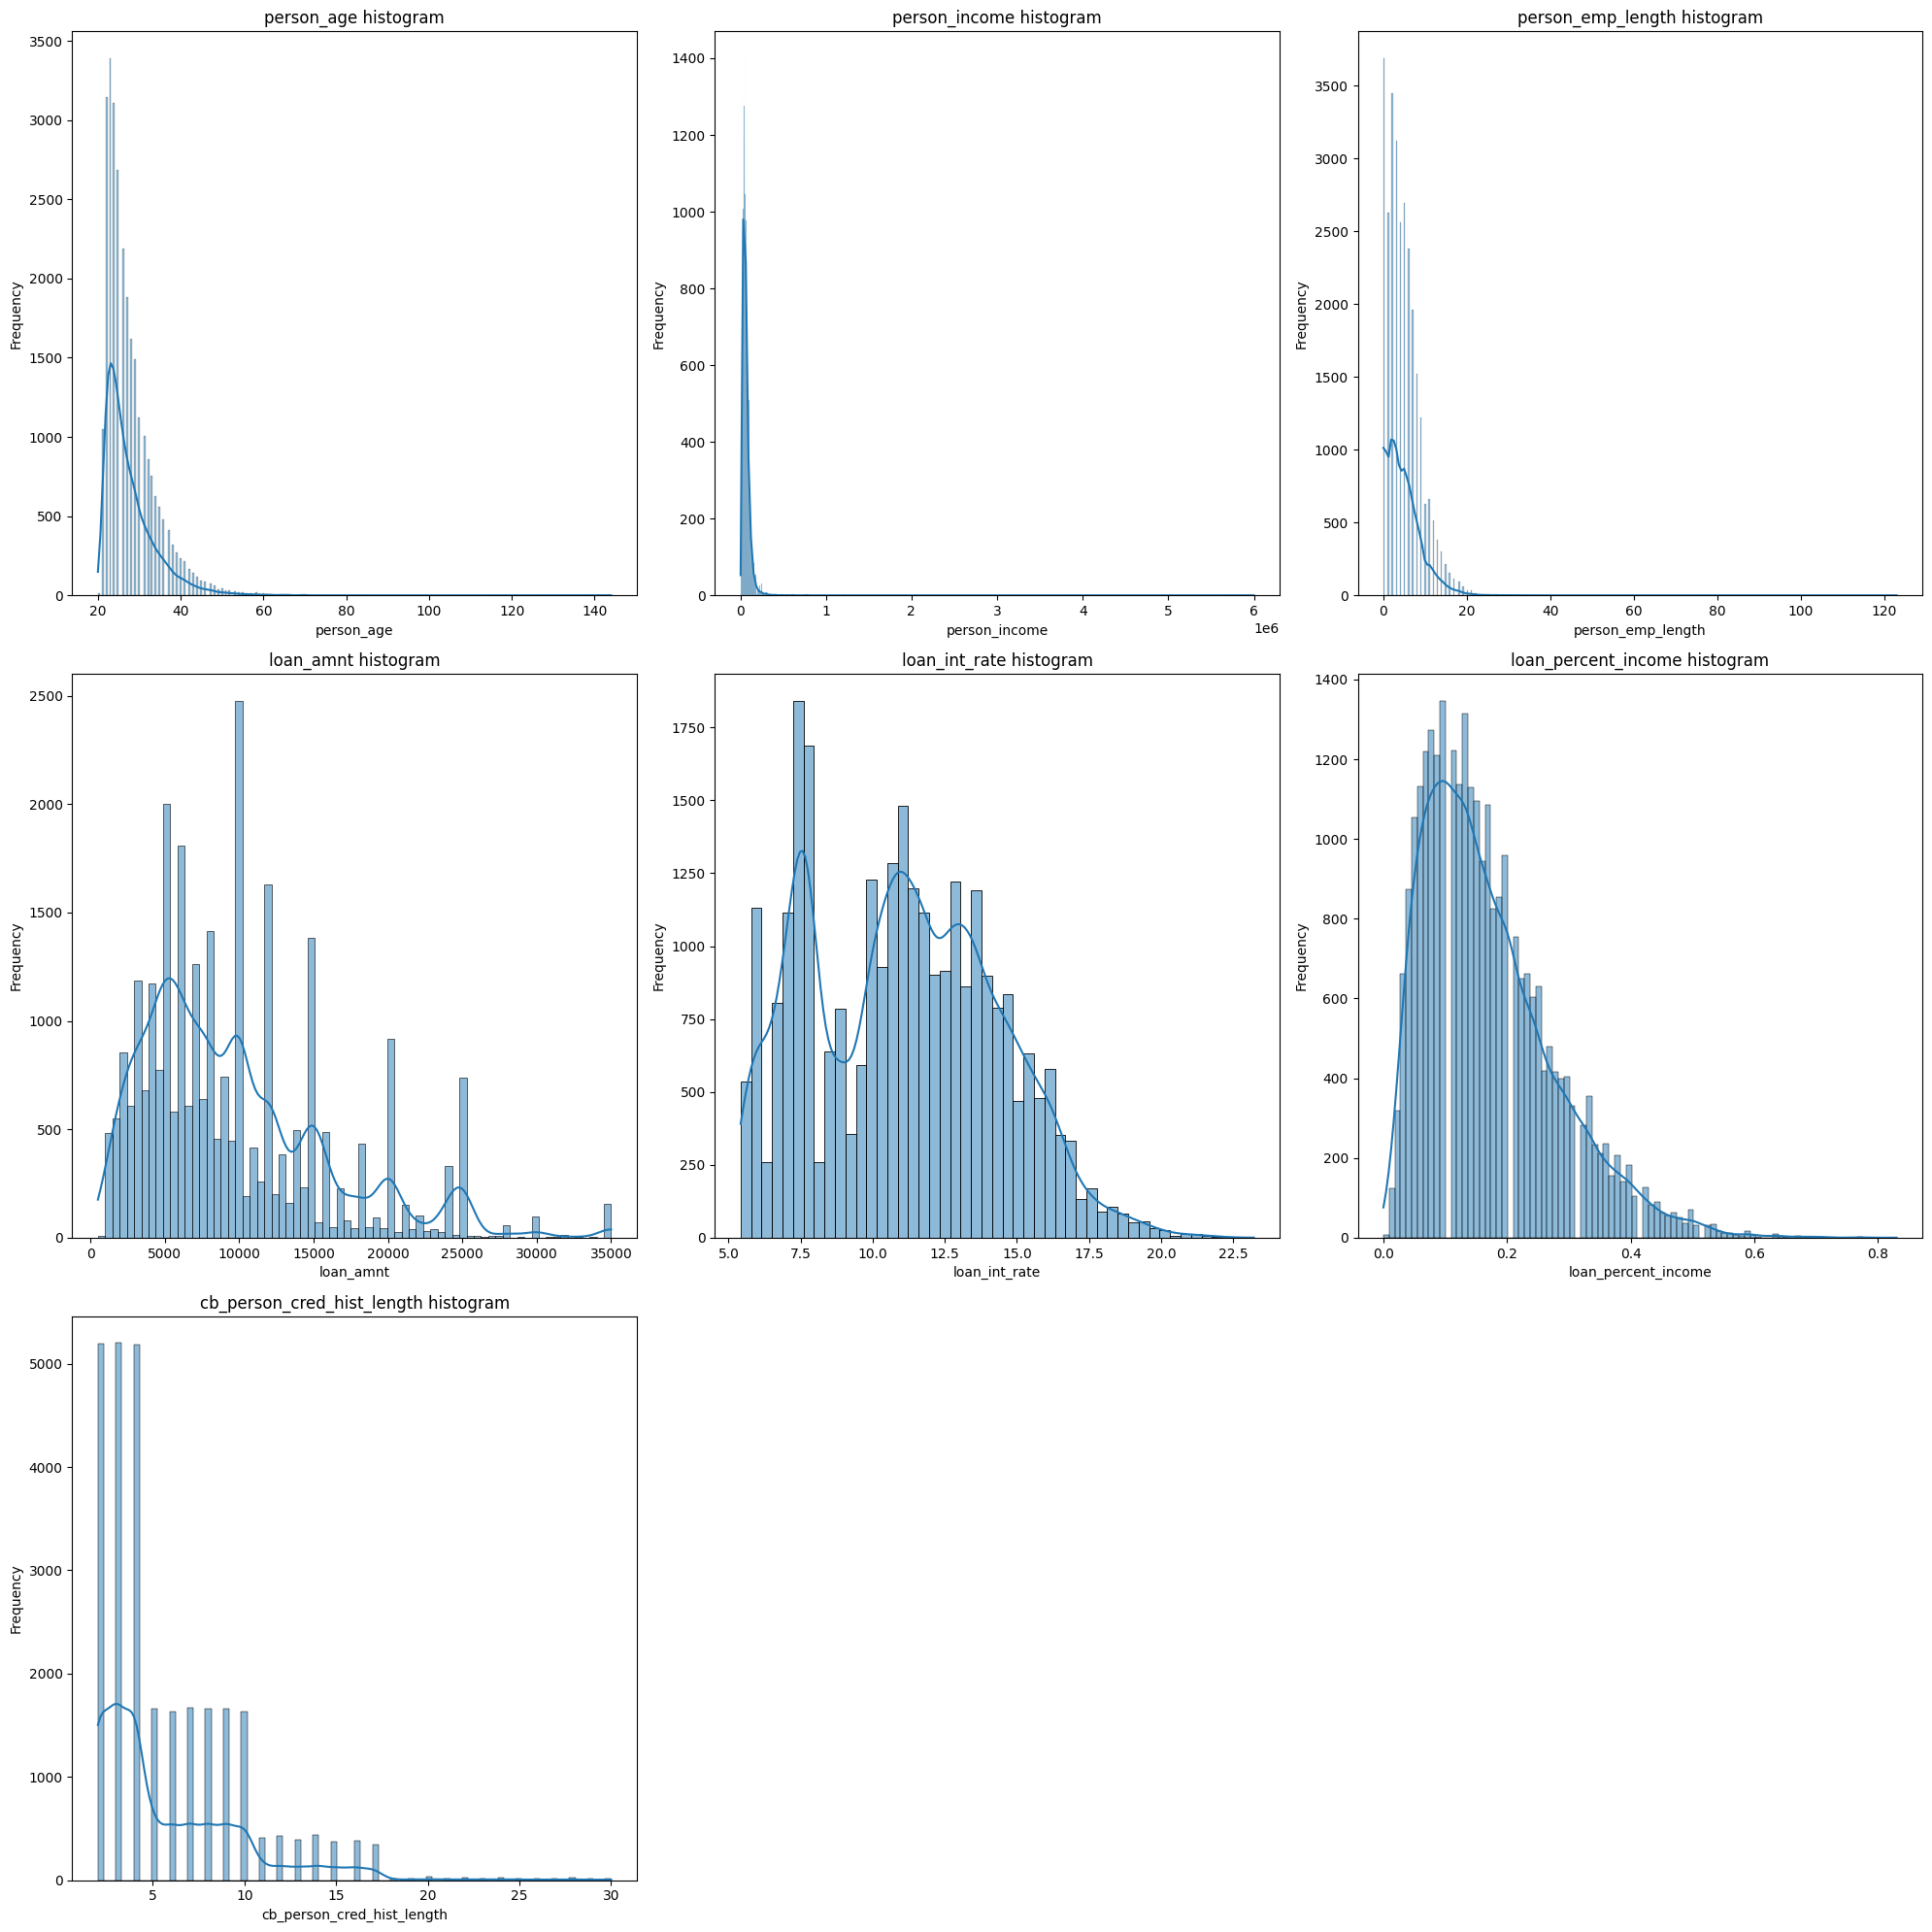

Categorical features


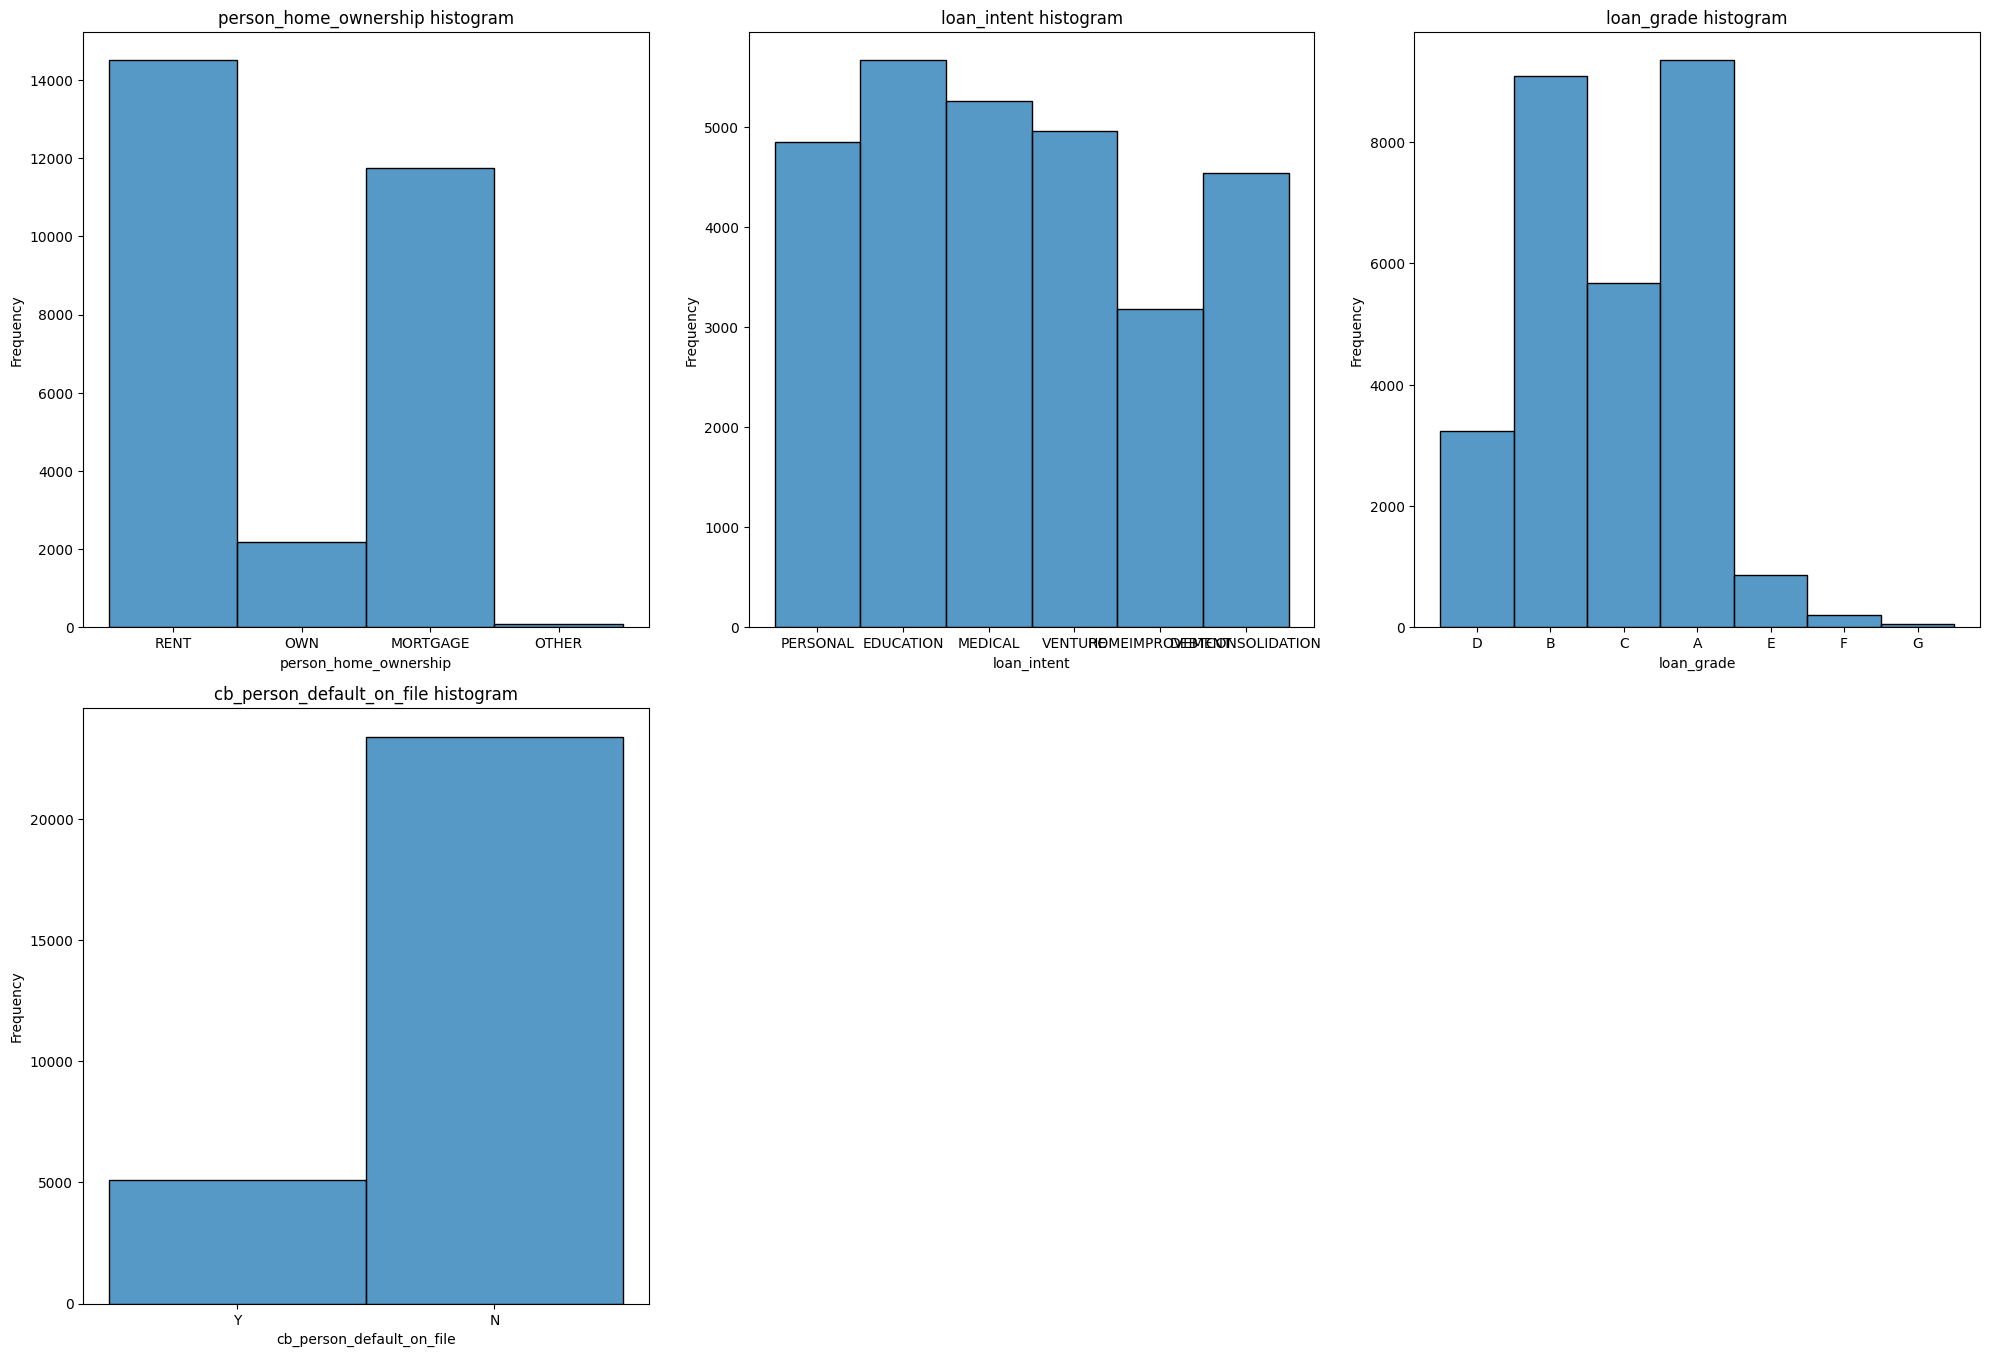

Target Variable


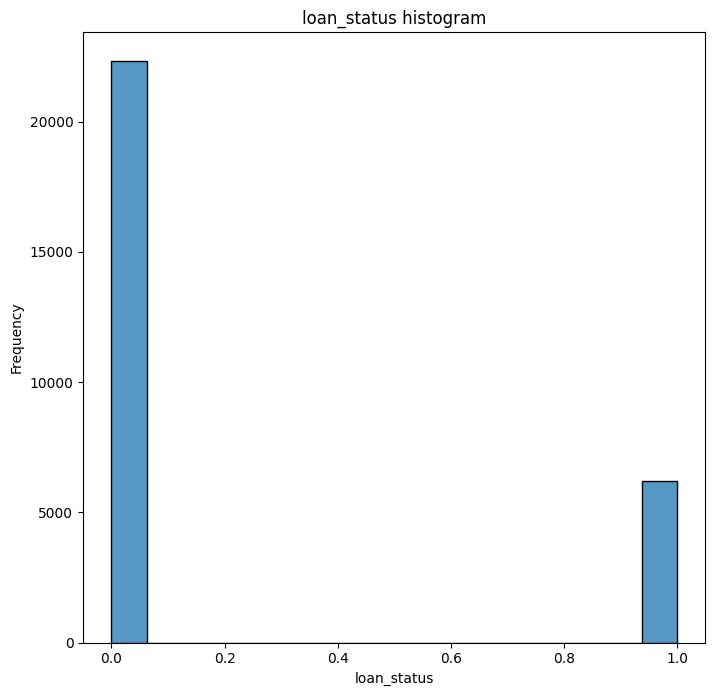

In [15]:
print("Numerical features")
plot_histograms(df,numerical_columns,kde=True)
print("Categorical features")
plot_histograms(df,cat_cols)
print("Target Variable")
plot_histograms(df,[target_variable])

While the categorical features distribution looks normal , the numerical features looks to have some sort of outliers lets dig deeper

In [16]:

#check for MIN and MAX age

max_=df['person_age'].max()
min_=df['person_age'].min()
print("Max age is ", max_, "Min age is ",min_)

Max age is  144 Min age is  20


Here it is saying the max age of a customer is 144 lets dive deeper and look into it


<Axes: xlabel='person_age', ylabel='person_age'>

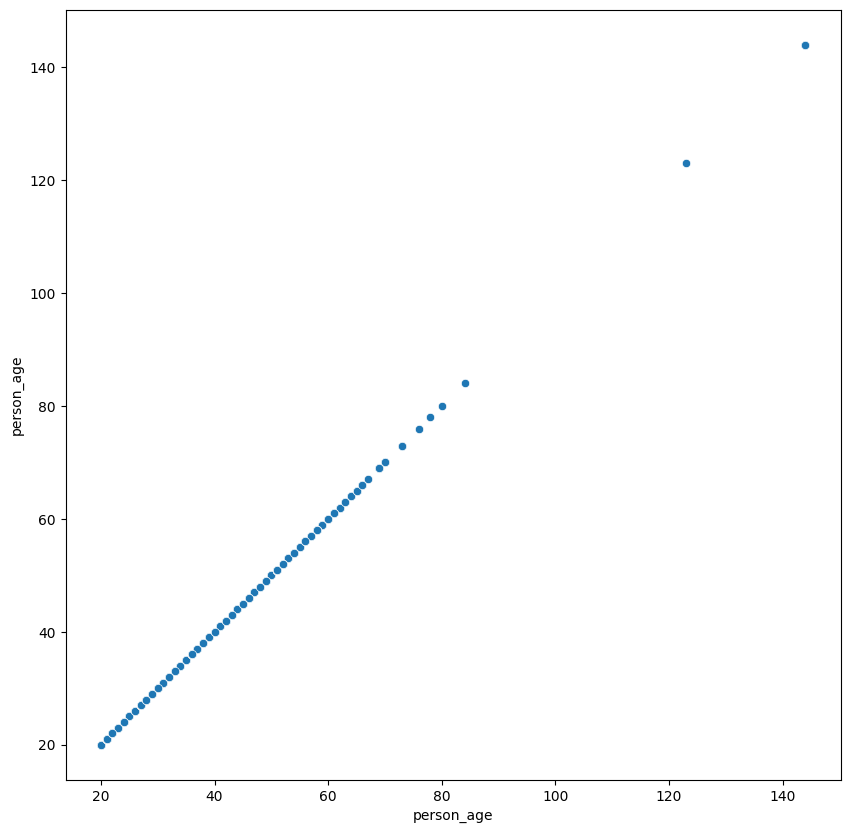

In [17]:
#scatter plot of person_age
plt.figure(figsize=(10,10))
sns.scatterplot(x='person_age',y='person_age',data=df)

Here we can see that there are some outliers lets see if that is true for other  numerical features as well

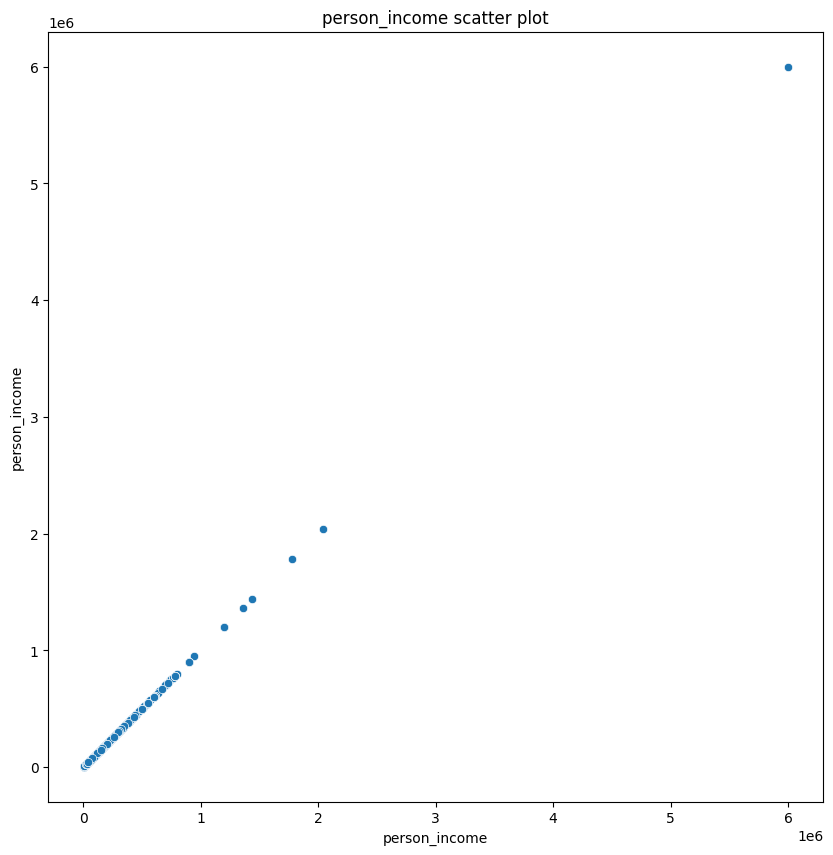

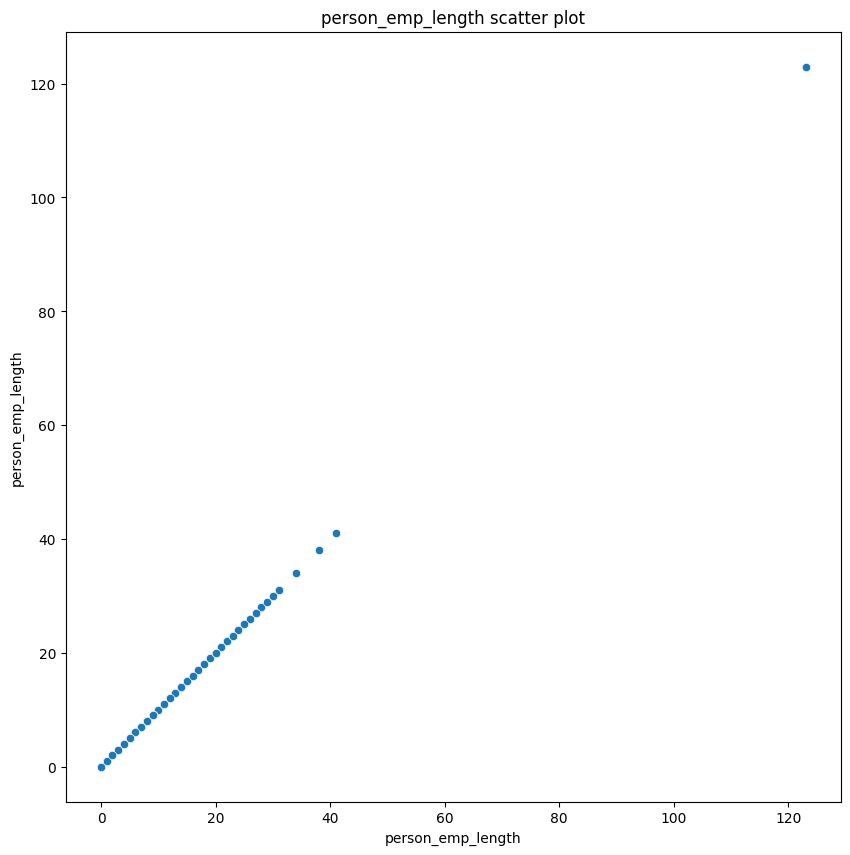

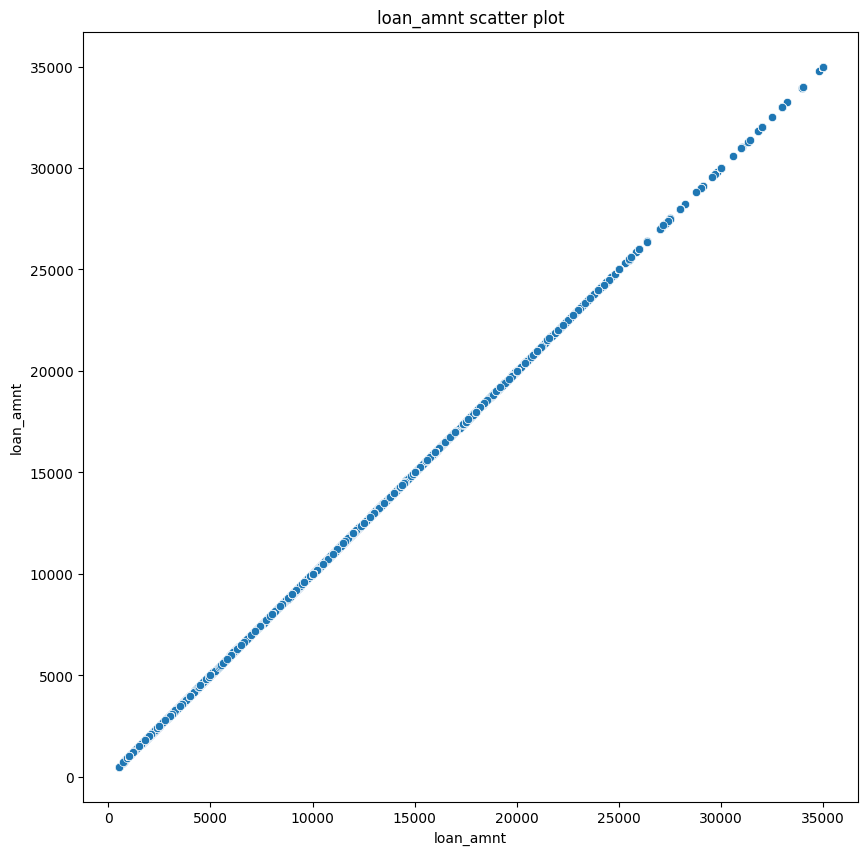

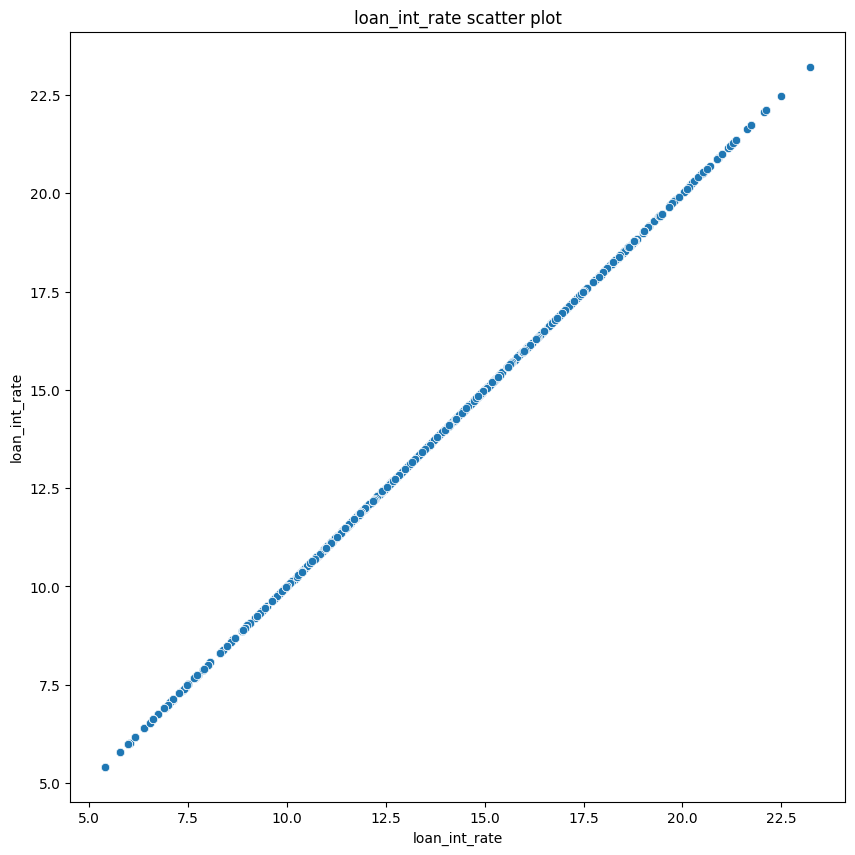

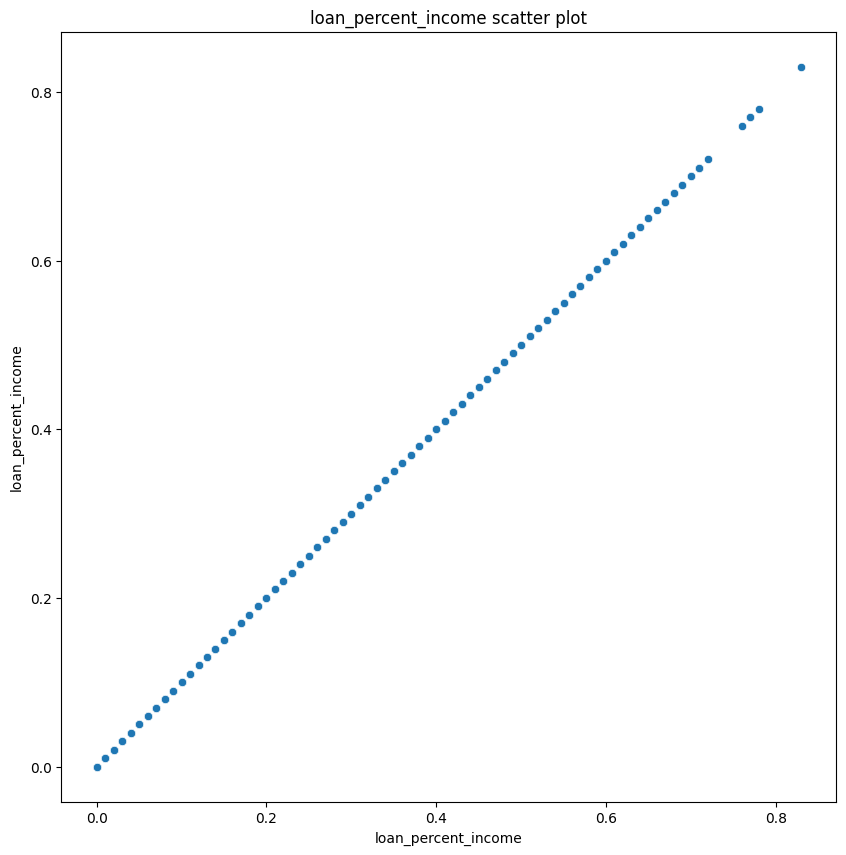

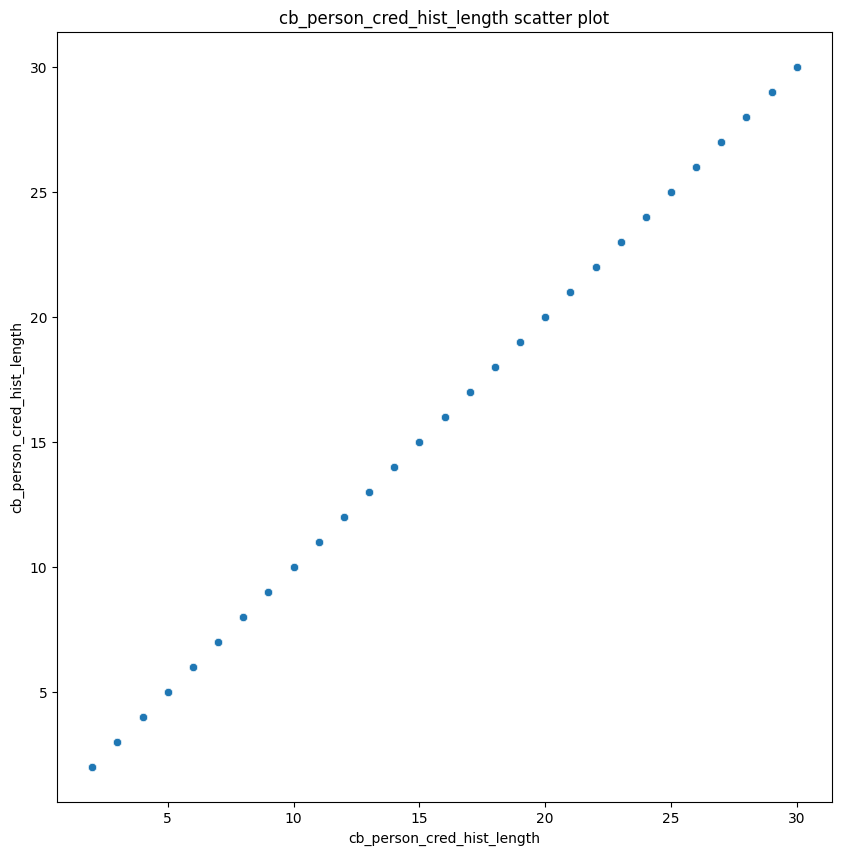

In [18]:
#scatter plot for other numerical columns
for col in numerical_columns[1:]:
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=col,y=col,data=df)
    plt.title(f'{col} scatter plot')
    plt.xlabel(col)
    plt.ylabel(col)
    plt.show()

Since there are few outliers lets remove them manually using threshold

In [19]:
df['person_emp_length'].max()

np.float64(123.0)

In [20]:
#threshols to remove outliers
thresholds={
    'person_age': [18,100],
    'person_emp_length': [0,100], # since it cannot be more than  person's age
    
}

In [21]:
#apply the threshold to remove outliers
for col, threshold in thresholds.items():
    df=df[(df[col]>=threshold[0]) & (df[col]<=threshold[1])]

In [22]:
df.shape

(28495, 12)

In [23]:
#lets see the distribution of age between x and y
def age_distribution(arr):
    lenarr=len(arr)
    for i in range(0,lenarr-1):
        next=arr[i]+1
        num_people=df['person_age'].between(next,arr[i+1]).sum()
        print(f"Number of people between {next} and {arr[i+1]} is {num_people}")
age_distribution([0,18,25,35,45,55,65,75,85])


Number of people between 1 and 18 is 0
Number of people between 19 and 25 is 13389
Number of people between 26 and 35 is 12099
Number of people between 36 and 45 is 2446
Number of people between 46 and 55 is 443
Number of people between 56 and 65 is 93
Number of people between 66 and 75 is 21
Number of people between 76 and 85 is 4


Here most people age lie between 19 and 35 which represents 89.4 % of the total population

In [24]:
#lets check for income
max_=df['person_income'].max()
min_=df['person_income'].min()
print("Max income is ", max_, "Min income is ",min_)



Max income is  2039784 Min income is  4000


In [25]:

#people with income between x and y
def income_distribution(arr):
    lenarr=len(arr)
    for i in range(0,lenarr-1):
        next=arr[i]+1
        num_people=df['person_income'].between(next,arr[i+1]).sum()
        print(f"Number of people between {next} and {arr[i+1]} is {num_people}")
income_distribution([0,25000,50000,75000,100000,125000,float('inf')])

Number of people between 1 and 25000 is 1960
Number of people between 25001 and 50000 is 10144
Number of people between 50001 and 75000 is 8500
Number of people between 75001 and 100000 is 4173
Number of people between 100001 and 125000 is 1813
Number of people between 125001 and inf is 1905


In [26]:
#lets check for loan amount
max_=df['loan_amnt'].max()
min_=df['loan_amnt'].min()
print("Max loan amount is ", max_, "Min loan amount is ",min_)



Max loan amount is  35000 Min loan amount is  500


In [27]:
#people with loan amount between x and y
def loan_amount_distribution(arr):
    lenarr=len(arr)
    for i in range(0,lenarr-1):
        next=arr[i]+1
        num_people=df['loan_amnt'].between(next,arr[i+1]).sum()
        print(f"Number of people between {next} and {arr[i+1]} is {num_people}")    
loan_amount_distribution([0,5000,10000,15000,float('inf')])

Number of people between 1 and 5000 is 8137
Number of people between 5001 and 10000 is 10564
Number of people between 10001 and 15000 is 5399
Number of people between 15001 and inf is 4395


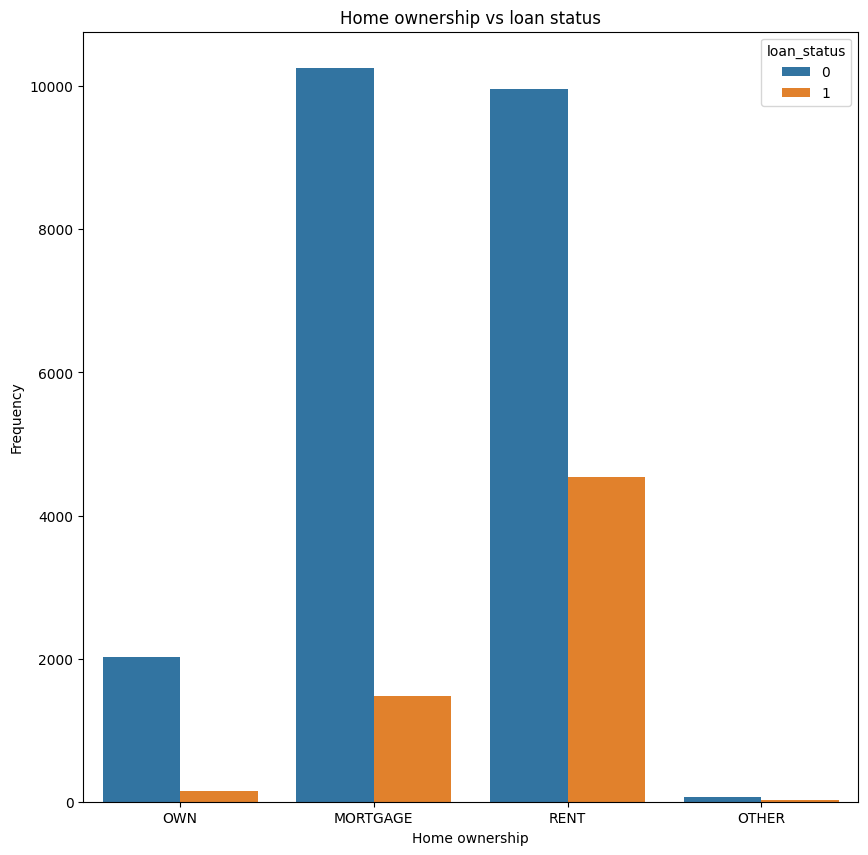

In [28]:
#lets move on to bi variate analysis
#lets see the relationship between Hoursiing and loan status
plt.figure(figsize=(10,10))
sns.countplot(x='person_home_ownership',hue='loan_status',data=df)
plt.title('Home ownership vs loan status')
plt.xlabel('Home ownership')
plt.ylabel('Frequency')
plt.show()


Here people who have mortgage and rent are more likely to go default compared to those own

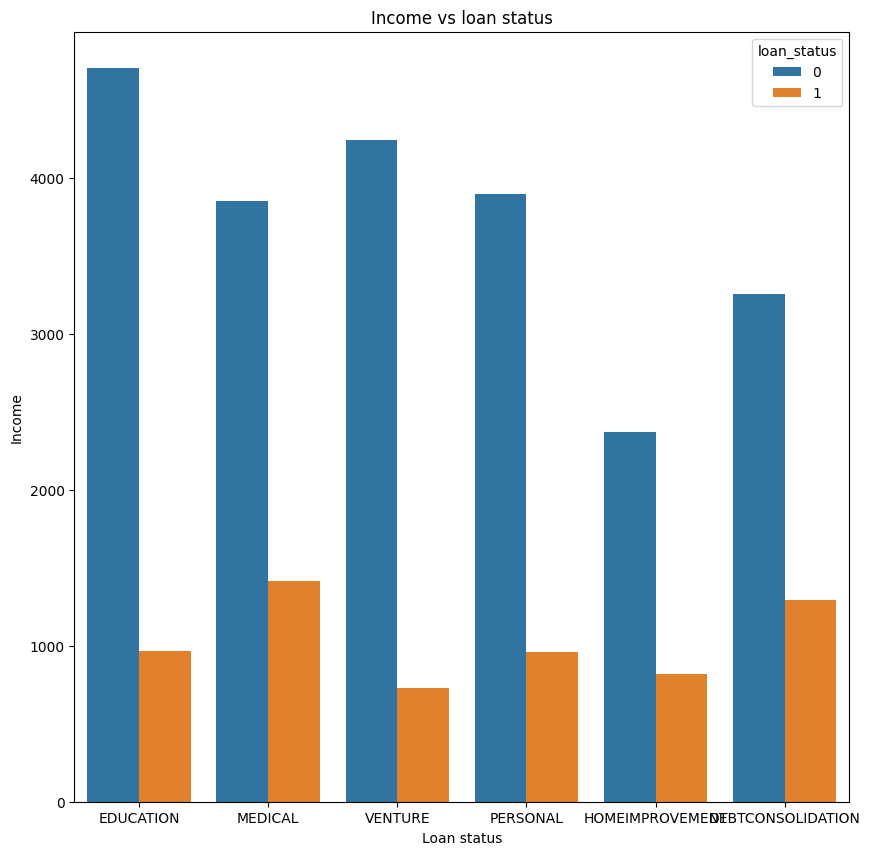

In [29]:
#lets see the relationship between loan_intet and loan status
plt.figure(figsize=(10,10))
sns.countplot(x='loan_intent',hue='loan_status',data=df)
plt.title('Income vs loan status')
plt.xlabel('Loan status')
plt.ylabel('Income')
plt.show()

Here people who took loan for Medical and Debt consolidation reason are more likely to be default compared to other but it is not much difference

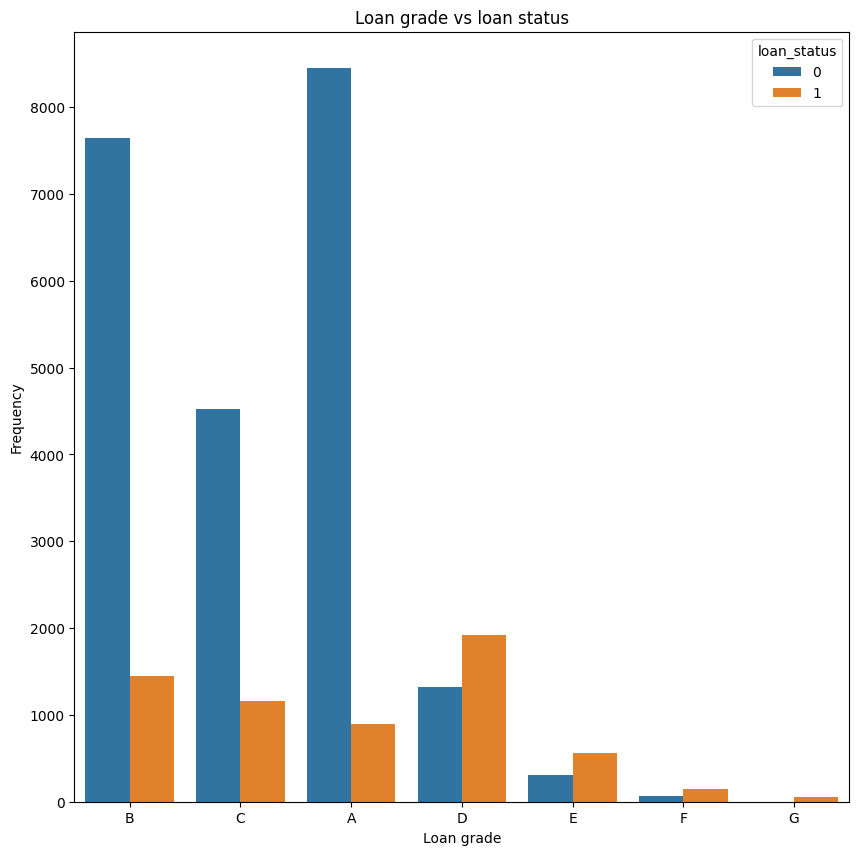

In [30]:
#lets see the relationship between loan_grade and loan status
plt.figure(figsize=(10,10))
sns.countplot(x='loan_grade',hue='loan_status',data=df)
plt.title('Loan grade vs loan status')
plt.xlabel('Loan grade')
plt.ylabel('Frequency')
plt.show()


Here customers with loan grade A,B,C and D are more likely to default on their loan

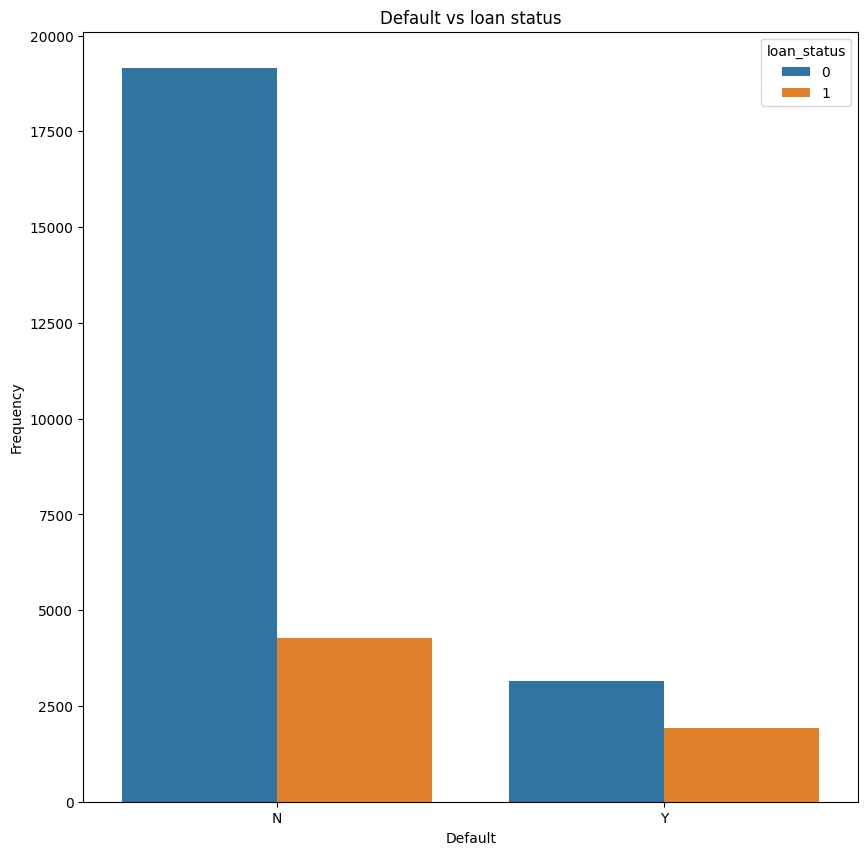

In [31]:
#lets see the relationship between person_default and loan status
plt.figure(figsize=(10,10))
sns.countplot(x='cb_person_default_on_file',hue='loan_status',data=df)
plt.title('Default vs loan status')
plt.xlabel('Default')
plt.ylabel('Frequency')
plt.show()


For Machine learning models, first lets use models which can handle imbalance data like trees and boosting classifier after that we will use Oversampling and apply other classification models
we will use One Hot Encoder since LabelEncoder assumes created rank which is not there


In [32]:
#importing necessary library for algoriothms and feature engineering

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder



#

In [33]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']


In [71]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [42]:
#lets create a pipeline for preprocessing
preprocessor=ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(),numerical_columns),
        ('cat',OneHotEncoder(),cat_cols)
    ],
    remainder='drop'
)

In [43]:
#label encoding the target variable
le=LabelEncoder()
y=le.fit_transform(y)


In [ ]:
#Defining classifiers to test

classifiers={
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

In [45]:
#creating pipleines to each classifier
pipelines={
    name:Pipeline([
        ('preprocessor',preprocessor),
        ('classifier',classifier)
    ]) for name,classifier in classifiers.items()
}

In [72]:
#evaluating each model
for name,pipeline in pipelines.items():
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    print(f'{name} accuracy is {accuracy_score(y_test,y_pred)}')
    print(f'{name} precision is {precision_score(y_test,y_pred)}')
    print(f'{name} recall is {recall_score(y_test,y_pred)}')
    print(f'{name} f1 score is {f1_score(y_test,y_pred)}')
    print(f'{name} confusion matrix is {confusion_matrix(y_test,y_pred)}')
    
    print('\n\n\n')

Decision Tree accuracy is 0.8848920863309353
Decision Tree precision is 0.7224770642201835
Decision Tree recall is 0.7633279483037156
Decision Tree f1 score is 0.7423409269442263
Decision Tree confusion matrix is [[4098  363]
 [ 293  945]]




Random Forest accuracy is 0.9326197578522548
Random Forest precision is 0.9581545064377682
Random Forest recall is 0.721324717285945
Random Forest f1 score is 0.8230414746543778
Random Forest confusion matrix is [[4422   39]
 [ 345  893]]




Gradient Boosting accuracy is 0.9241972275837866
Gradient Boosting precision is 0.9305555555555556
Gradient Boosting recall is 0.7035541195476576
Gradient Boosting f1 score is 0.8012879484820608
Gradient Boosting confusion matrix is [[4396   65]
 [ 367  871]]






c:\Users\ddshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy is 0.8899806983681348
AdaBoost precision is 0.7963142580019399
AdaBoost recall is 0.6631663974151858
AdaBoost f1 score is 0.7236668135742618
AdaBoost confusion matrix is [[4251  210]
 [ 417  821]]




XGBoost accuracy is 0.931040533426917
XGBoost precision is 0.934224049331963
XGBoost recall is 0.7342487883683361
XGBoost f1 score is 0.8222523744911805
XGBoost confusion matrix is [[4397   64]
 [ 329  909]]






Since it is an imbalance dataset ,models like RandomForest and XGBoost really shines here, so it was most probable that it was likely to receive high scores in all the category.
Now lets dive deeper into both and see if we can increase the scores further and a1so test moder generalizatio using cross fold validation
Lets start with Hyperparamter tuning to get the best performance out of this model and then we will see if the model can generalize well as well


In [57]:
#implementing hyper parameter tuning for Random Forest
param_grid={
'classifier__n_estimators': [10, 20, 50, 100, 150, 200],
'classifier__max_depth': [5, 10, 15, 20],
'classifier__min_samples_split': [2, 5, 10, 15, 20],
'classifier__min_samples_leaf': [1, 2, 5, 10, 15]
}

#parameters for Xgboost
param_grid2={
'classifier__max_depth': [5, 10, 15, 20],
'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],
'classifier__gamma': [0.001, 0.01, 0.1, 1, 10],
'classifier__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'classifier__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

}

In [55]:
#creating pipleines to each classifier
pipeline_tuning=Pipeline([
        ('preprocessor',preprocessor),
        ('classifier',RandomForestClassifier())
    ]) 


In [58]:
grid_search_rf=GridSearchCV(pipeline_tuning,param_grid,cv=5 ,
                            scoring='precision',
                            n_jobs=-1)
grid_search_rf.fit(X_train,y_train)

c:\Users\ddshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_emp_length',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_cred_hist_length']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'cb_person_default_on_file'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 10, 15, 20],
                         'classifier__min_samples_leaf': [1, 2, 5, 10, 15],
                         'classifier__min_samples_split': [2, 5, 10, 15, 20],
                         'classifier__n_estimators': [10, 20, 50, 100, 150,
                                                      200]},
             scoring='precision')

In [59]:
# Check the best parameters found
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best precision score: ", grid_search_rf.best_score_)

Best parameters found:  {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 150}
Best precision score:  0.9729610059222134


In [68]:
rf_best=RandomForestClassifier(max_depth= 20,min_samples_leaf= 5,min_samples_split= 10,n_estimators= 150)

In [61]:
#lets do the same for xgboost as well
#creating pipleines to each classifier
pipeline_tuning_xgboost=Pipeline([
        ('preprocessor',preprocessor),
        ('classifier',XGBClassifier())
    ]) 


In [63]:
grid_search_xgb=GridSearchCV(pipeline_tuning_xgboost,param_grid2,cv=5 ,
                            scoring='precision',
                            n_jobs=-1)
grid_search_xgb.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_emp_length',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_cred_hist_length']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'cb_person_default_on_file'])]...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1, 10],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'classifier__max_depth': [5, 10, 15, 20],
                         'classifier__subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                   1.0]},
             scoring='precision')

In [69]:
# Check the best parameters found
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best precision score: ", grid_search_xgb.best_score_)

Best parameters found:  {'classifier__colsample_bytree': 0.5, 'classifier__gamma': 0.01, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 20, 'classifier__subsample': 1.0}
Best precision score:  0.9947433071847899


In [ ]:
xgb_best=XGBClassifier(colsample_bytree=0.5, gamma= 0.01, learning_rate= 0.01, max_depth= 20, subsample= 1.0)

In [76]:
#Defining classifiers to test

best_classifiers={
    'rf_best':RandomForestClassifier(max_depth= 20,min_samples_leaf= 5,min_samples_split= 10,n_estimators= 150),
    'xgb_best':XGBClassifier(colsample_bytree=0.5, gamma= 0.01, learning_rate= 0.01, max_depth= 20, subsample= 1.0)
}

In [84]:
#creating pipleines to each classifier
pipelines={
    name:Pipeline([
        ('preprocessor',preprocessor),
        ('best_classifier',classifier)
    ]) for name,classifier in best_classifiers.items()
}

In [85]:
#lets check their performance on test set
#evaluating each model

for name,pipeline in pipelines.items():
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    print(f'{name} accuracy is {accuracy_score(y_test,y_pred)}')
    print(f'{name} precision is {precision_score(y_test,y_pred)}')
    print(f'{name} recall is {recall_score(y_test,y_pred)}')
    print(f'{name} f1 score is {f1_score(y_test,y_pred)}')
    print(f'{name} confusion matrix is {confusion_matrix(y_test,y_pred)}')
    
    print('\n\n\n')

rf_best accuracy is 0.9298122477627654
rf_best precision is 0.963495575221239
rf_best recall is 0.7035541195476576
rf_best f1 score is 0.8132586367880486
rf_best confusion matrix is [[4428   33]
 [ 367  871]]




xgb_best accuracy is 0.9096332689945604
xgb_best precision is 0.9931787175989086
xgb_best recall is 0.5880452342487884
xgb_best f1 score is 0.7387113140537798
xgb_best confusion matrix is [[4456    5]
 [ 510  728]]






Here overall scores of Random Forest is better so we will use that to deploy the mode in our web app
Lets create pipeline for the same

In [94]:
#creating pipleines to each classifier
rf_best_pipeline=Pipeline([
        ('preprocessor',preprocessor),
        ('model',RandomForestClassifier(max_depth= 20,min_samples_leaf= 5,min_samples_split= 10,n_estimators= 150))
    ]) 


In [95]:
rf_best_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=5,
                                        min_samples_split=10,
                                        n_estimators=150))])

In [96]:
import joblib
joblib.dump(rf_best_pipeline,'RandomForest_Best.joblib')

['RandomForest_Best.joblib']

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
